In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
customers = pd.read_csv('/Users/tanmaie/Downloads/intern-bootcamp/data/raw/customers.csv')
order_items = pd.read_csv('/Users/tanmaie/Downloads/intern-bootcamp/data/raw/order_items.csv')
orders = pd.read_csv('/Users/tanmaie/Downloads/intern-bootcamp/data/raw/orders.csv')
products = pd.read_csv('/Users/tanmaie/Downloads/intern-bootcamp/data/raw/products.csv')
transactions = pd.read_csv('/Users/tanmaie/Downloads/intern-bootcamp/data/raw/transactions.csv')

In [ ]:
orders.columns
orders.head()

,order_id,customer_id,order_date,status
0,1,92,2024-12-12,Pending
1,2,46,2024-12-31,Shipped
2,3,30,2025-10-10,Delivered
3,4,52,2024-10-20,Pending
4,5,37,2025-06-15,Cancelled


In [ ]:
order_items.columns
order_items.head()

,order_id,product_id,quantity,unit_price,total_price
0,1,31,1,353.08,353.08
1,1,31,2,353.08,706.16
2,1,44,2,402.07,804.14
3,1,25,3,423.75,1271.25
4,2,48,1,188.68,188.68


In [17]:
products.columns
products.head()

,product_id,product_name,category,price,stock
0,1,Today,Fashion,288.01,124
1,2,Worry,Electronics,201.22,46
2,3,Only,Books,351.00,25
3,4,Kid,Electronics,386.27,51
4,5,Article,Home,179.77,132


<Axes: xlabel='stock', ylabel='price'>

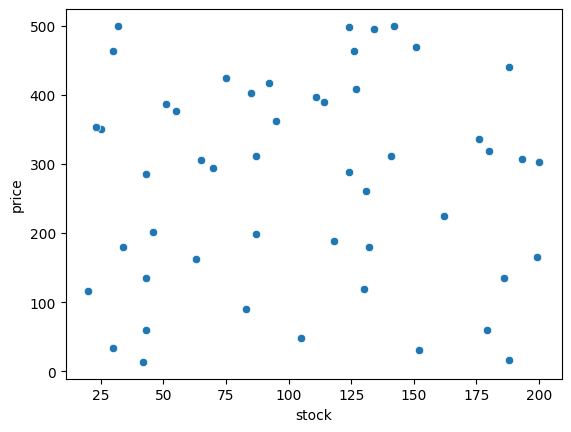

In [71]:
sns.scatterplot(data=products, x='stock', y='price')

<Axes: xlabel='stock', ylabel='Count'>

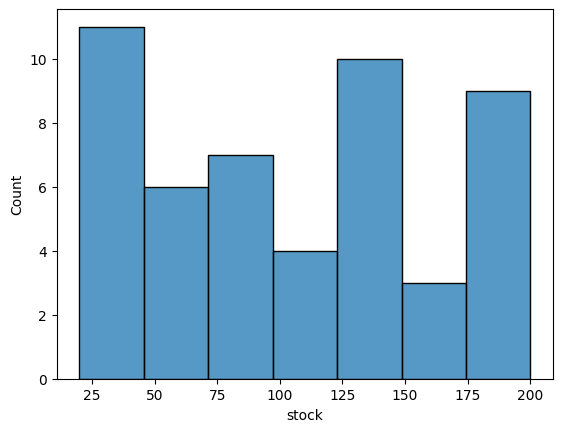

In [63]:
sns.histplot(data=products, x='stock')

<Axes: xlabel='category', ylabel='price'>

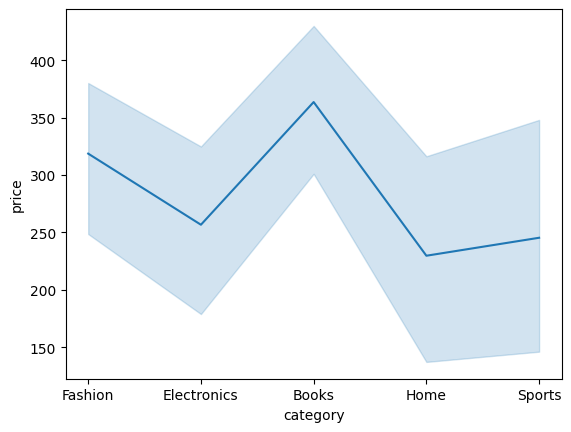

In [51]:
sns.lineplot(data=products, x='category', y='price')

In [39]:
transactions.columns
transactions.head()

,transaction_id,order_id,payment_method,amount,transaction_date
0,1,1,COD,3134.63,2024-12-12
1,2,2,Bank Transfer,983.00,2024-12-31
2,3,3,Bank Transfer,479.94,2025-10-10
3,4,4,Credit Card,318.78,2024-10-20
4,5,5,Credit Card,1363.80,2025-06-15


In [ ]:
plt.scatter()

<BarContainer object of 200 artists>

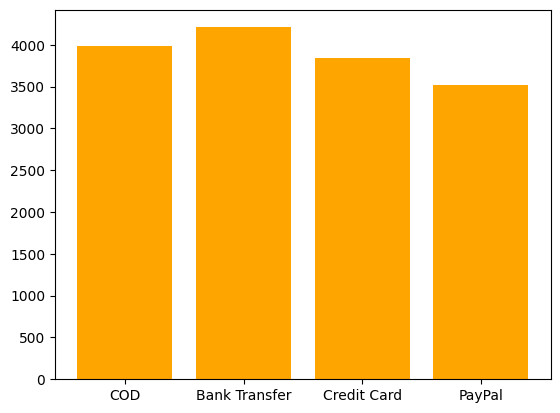

In [66]:
plt.bar(transactions['payment_method'], transactions['amount'], color='orange')

Text(0.5, 1.0, 'Scatter Plot of category vs  price')

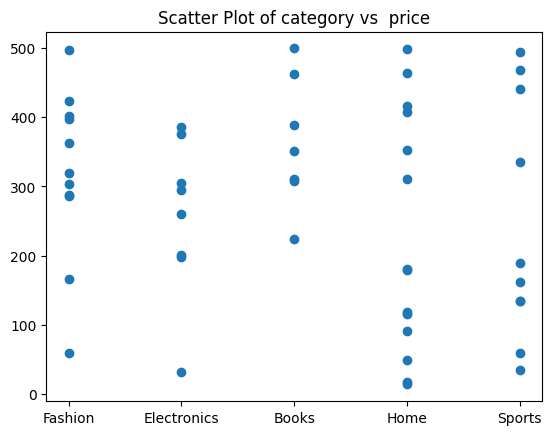

In [28]:
plt.scatter(products['category'], products['price'])
plt.title('Scatter Plot of category vs  price')

<Axes: xlabel='category', ylabel='price'>

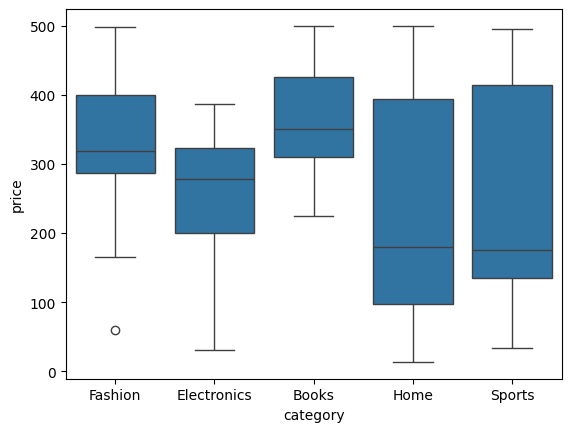

In [91]:
sns.boxplot(x='category', y='price', data=products)

merging data 

In [95]:
order_customers = pd.merge(orders, customers, on='customer_id', how='inner')
orders_items = pd.merge(order_items, orders, on = 'order_id', how = 'inner')

order_customers.head()

,order_id,customer_id,order_date,status,name,email,phone,city,country,created_at
0,1,92,2024-12-12,Pending,Melissa Kim,victorsolis@example.org,001-511-767-7133,Emilytown,Switzerland,2024-05-13
1,2,46,2024-12-31,Shipped,Chelsea Smith,fglenn@example.com,949.600.6053x34155,Adamston,Colombia,2024-02-16
2,3,30,2025-10-10,Delivered,Brittany Sanford,daychristine@example.net,(608)204-9335x2936,East Brandy,Belize,2025-07-13
3,4,52,2024-10-20,Pending,Micheal Lee,yjennings@example.org,431-526-0680x059,New Kaylachester,Korea,2025-09-15
4,5,37,2025-06-15,Cancelled,Casey Anthony,rebecca95@example.com,001-962-507-1713x5629,Jasonstad,Saint Pierre and Miquelon,2024-12-07


In [96]:
orders_items.head()

,order_id,product_id,quantity,unit_price,total_price,customer_id,order_date,status
0,1,31,1,353.08,353.08,92,2024-12-12,Pending
1,1,31,2,353.08,706.16,92,2024-12-12,Pending
2,1,44,2,402.07,804.14,92,2024-12-12,Pending
3,1,25,3,423.75,1271.25,92,2024-12-12,Pending
4,2,48,1,188.68,188.68,46,2024-12-31,Shipped


In [102]:
sales_data = pd.merge(orders_items, products, on='product_id', how='inner')
sales_data.head()

,order_id,product_id,quantity,unit_price,total_price,customer_id,order_date,status,product_name,category,price,stock
0,1,31,1,353.08,353.08,92,2024-12-12,Pending,Popular,Home,353.08,23
1,1,31,2,353.08,706.16,92,2024-12-12,Pending,Popular,Home,353.08,23
2,1,44,2,402.07,804.14,92,2024-12-12,Pending,Make,Fashion,402.07,85
3,1,25,3,423.75,1271.25,92,2024-12-12,Pending,Real,Fashion,423.75,75
4,2,48,1,188.68,188.68,46,2024-12-31,Shipped,Development,Sports,188.68,118


In [ ]:
total_revenue = sales_data['quantity']*sales_data['price']
sales_data['total_revenue'] = total_revenue
sales_data.head()


,order_id,product_id,quantity,unit_price,total_price,customer_id,order_date,status,product_name,category,price,stock,date,total_revenue
0,1,31,1,353.08,353.08,92,2024-12-12,Pending,Popular,Home,353.08,23,2024-12-12,353.08
1,1,31,2,353.08,706.16,92,2024-12-12,Pending,Popular,Home,353.08,23,2024-12-12,706.16
2,1,44,2,402.07,804.14,92,2024-12-12,Pending,Make,Fashion,402.07,85,2024-12-12,804.14
3,1,25,3,423.75,1271.25,92,2024-12-12,Pending,Real,Fashion,423.75,75,2024-12-12,1271.25
4,2,48,1,188.68,188.68,46,2024-12-31,Shipped,Development,Sports,188.68,118,2024-12-31,188.68


In [132]:
sales_data.head()

,order_id,product_id,quantity,unit_price,total_price,customer_id,order_date,status,product_name,category,price,stock,date
0,1,31,1,353.08,353.08,92,2024-12-12,Pending,Popular,Home,353.08,23,2024-12-12
1,1,31,2,353.08,706.16,92,2024-12-12,Pending,Popular,Home,353.08,23,2024-12-12
2,1,44,2,402.07,804.14,92,2024-12-12,Pending,Make,Fashion,402.07,85,2024-12-12
3,1,25,3,423.75,1271.25,92,2024-12-12,Pending,Real,Fashion,423.75,75,2024-12-12
4,2,48,1,188.68,188.68,46,2024-12-31,Shipped,Development,Sports,188.68,118,2024-12-31


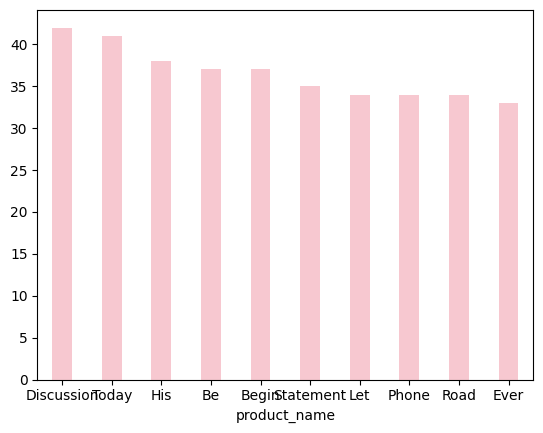

In [109]:
top_10 = sales_data.groupby('product_name')['quantity'].sum().nlargest(10)
sns.barplot(y = top_10.values, x = top_10.index, color='pink', width = 0.4)
plt.show()

In [112]:
sales_data['date'] = pd.to_datetime(sales_data['order_date'])
sales_data.head()

,order_id,product_id,quantity,unit_price,total_price,customer_id,order_date,status,product_name,category,price,stock,date
0,1,31,1,353.08,353.08,92,2024-12-12,Pending,Popular,Home,353.08,23,2024-12-12
1,1,31,2,353.08,706.16,92,2024-12-12,Pending,Popular,Home,353.08,23,2024-12-12
2,1,44,2,402.07,804.14,92,2024-12-12,Pending,Make,Fashion,402.07,85,2024-12-12
3,1,25,3,423.75,1271.25,92,2024-12-12,Pending,Real,Fashion,423.75,75,2024-12-12
4,2,48,1,188.68,188.68,46,2024-12-31,Shipped,Development,Sports,188.68,118,2024-12-31


<Axes: xlabel='date'>

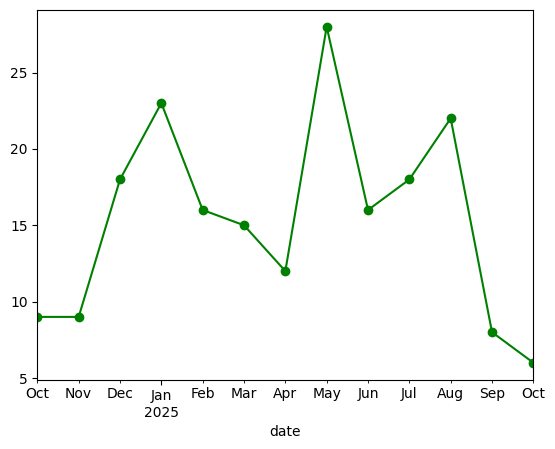

In [118]:
orders_per_month = sales_data.groupby(sales_data['date'].dt.to_period('M'))['order_id'].nunique()
orders_per_month.plot(kind='line', marker='o', color='green')

In [135]:
customers_orders = pd.merge(sales_data, customers , on = 'customer_id', how = 'inner')
customers_orders.head()

,order_id,product_id,quantity,unit_price,total_price,customer_id,order_date,status,product_name,category,price,stock,date,name,email,phone,city,country,created_at
0,1,31,1,353.08,353.08,92,2024-12-12,Pending,Popular,Home,353.08,23,2024-12-12,Melissa Kim,victorsolis@example.org,001-511-767-7133,Emilytown,Switzerland,2024-05-13
1,1,31,2,353.08,706.16,92,2024-12-12,Pending,Popular,Home,353.08,23,2024-12-12,Melissa Kim,victorsolis@example.org,001-511-767-7133,Emilytown,Switzerland,2024-05-13
2,1,44,2,402.07,804.14,92,2024-12-12,Pending,Make,Fashion,402.07,85,2024-12-12,Melissa Kim,victorsolis@example.org,001-511-767-7133,Emilytown,Switzerland,2024-05-13
3,1,25,3,423.75,1271.25,92,2024-12-12,Pending,Real,Fashion,423.75,75,2024-12-12,Melissa Kim,victorsolis@example.org,001-511-767-7133,Emilytown,Switzerland,2024-05-13
4,2,48,1,188.68,188.68,46,2024-12-31,Shipped,Development,Sports,188.68,118,2024-12-31,Chelsea Smith,fglenn@example.com,949.600.6053x34155,Adamston,Colombia,2024-02-16


Text(0.5, 1.0, 'Top 5 countries and their revenue')

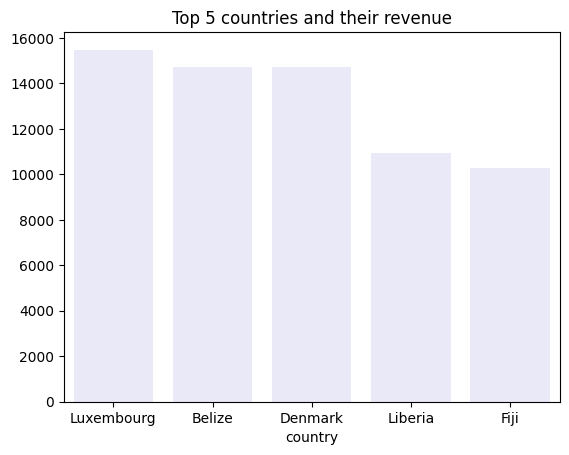

In [ ]:
top_5 = customers_orders.groupby('country')['total_price'].sum().nlargest(5)
sns.barplot(y = top_5.values, x = top_5.index, color = 'lavender' )
plt.title('Top 5 countries and their revenue')

<BarContainer object of 5 artists>

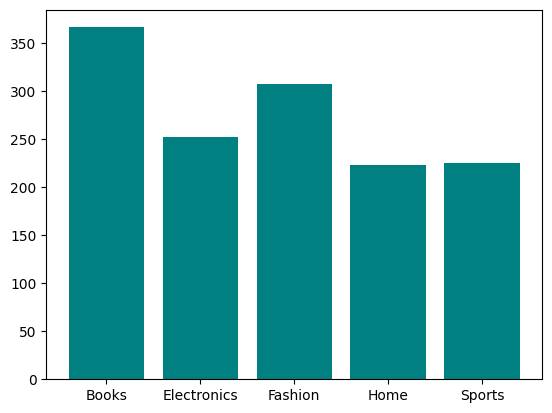

In [ ]:
#Compare average product price by category.
customers_orders.head()
avg_price_by_category = customers_orders.groupby('category')['price'].mean()
plt.bar(avg_price_by_category.index, avg_price_by_category.values, color = 'teal')

<BarContainer object of 4 artists>

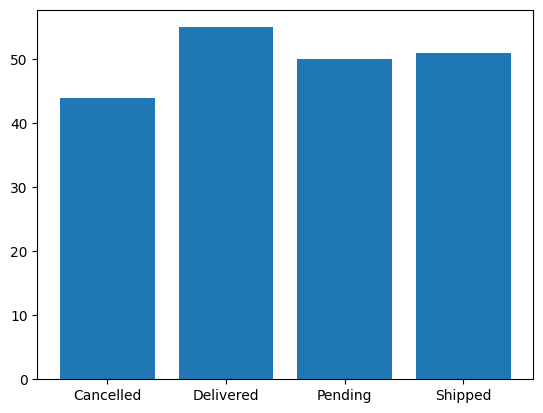

In [158]:
#Plot number of successful vs failed transactions.
transactions.head()
order_counts = orders.groupby('status').size()
filtered = order_counts[order_counts.index.isin(['Delivered', 'Cancelled'])]
plt.bar(order_counts.index, order_counts.values)


<BarContainer object of 2 artists>

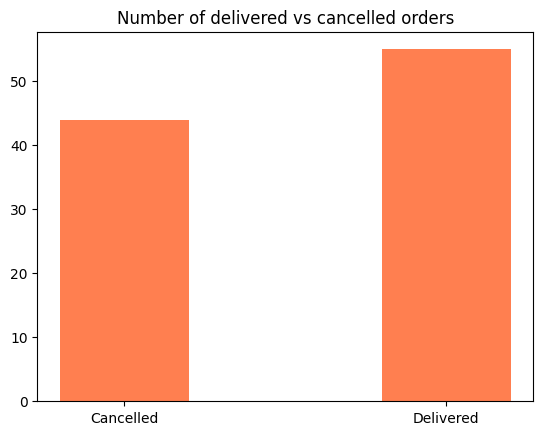

In [161]:
plt.title('Number of delivered vs cancelled orders')
plt.bar(filtered.index,filtered.values, color = 'coral', width = 0.4)

In [163]:
#Find which category has the highest average quantity per order.
sales_data.head()

,order_id,product_id,quantity,unit_price,total_price,customer_id,order_date,status,product_name,category,price,stock,date
0,1,31,1,353.08,353.08,92,2024-12-12,Pending,Popular,Home,353.08,23,2024-12-12
1,1,31,2,353.08,706.16,92,2024-12-12,Pending,Popular,Home,353.08,23,2024-12-12
2,1,44,2,402.07,804.14,92,2024-12-12,Pending,Make,Fashion,402.07,85,2024-12-12
3,1,25,3,423.75,1271.25,92,2024-12-12,Pending,Real,Fashion,423.75,75,2024-12-12
4,2,48,1,188.68,188.68,46,2024-12-31,Shipped,Development,Sports,188.68,118,2024-12-31


<Axes: xlabel='category'>

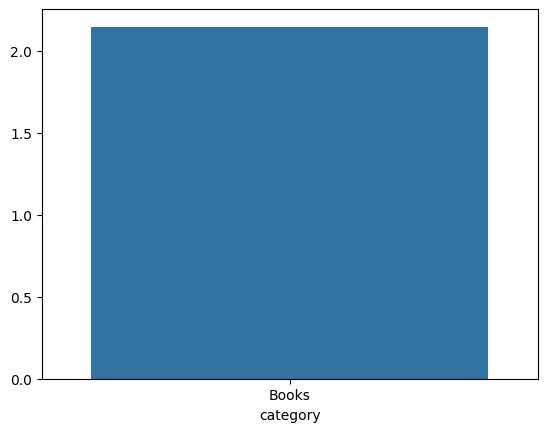

In [180]:
avg_q_per_order = sales_data.groupby('category')['quantity'].mean().nlargest(1)
sns.barplot( x=avg_q_per_order.index, y=avg_q_per_order.values)